In [1]:
# Note: After you run this cell, the training and test data will be available in
# the file browser. (Click the folder icon on the left to view it)
#
# If you don't see the data after the cell completes, click the refresh button
# in the file browser (folder icon with circular arrow)

# First, let's download and unzip the data
!echo "Downloading files..."
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training1.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training2.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_partial.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_classes_partial.csv

!echo "Unzipping files..."
!unzip -q training1.zip
!unzip -q training2.zip
!unzip -q test.zip
!unzip -q test_partial.zip

# Combine the two traning directories
!echo "Merging training data..."
!mkdir ./content/training
!mv ./content/training1/* /content/training
!mv ./content/training2/* /content/training

# Cleanup
!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test.zip
!rm test_partial.zip

!echo "Data ready."

Unzipping files...
unzip:  cannot find or open training1.zip, training1.zip.zip or training1.zip.ZIP.
unzip:  cannot find or open training2.zip, training2.zip.zip or training2.zip.ZIP.
unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.
unzip:  cannot find or open test_partial.zip, test_partial.zip.zip or test_partial.zip.ZIP.
Data ready.


In [4]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.resnet50 import ResNet50
import seaborn as sns

In [3]:
# We're using keras' ImageDataGenerator class to load our image data.
# See (https://keras.io/api/preprocessing/image/#imagedatagenerator-class) for details
#
# A couple of things to note:
# 1. We're specifying a number for the seed, so we'll always get the same shuffle and split of our images.
# 2. Class names are inferred automatically from the image subdirectory names.
# 3. We're splitting the training data into 80% training, 20% validation. 


training_dir = './content/training/'
image_size = (100, 100)

# Split up the training data images into training and validations sets
# We'll use and ImageDataGenerator to do the splits
# ImageDataGenerator can also be used to do preprocessing and agumentation on the files as can be seen with rescale

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.2)
validation_datagen = ImageDataGenerator( rescale=1./255, validation_split=.2)

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size = image_size,
        subset="training",
        batch_size=32,
        class_mode='sparse',
        seed=42,shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        training_dir,
        target_size=image_size,
        batch_size=32,
        class_mode='sparse',
        subset="validation",
        seed=42,
        shuffle=False)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


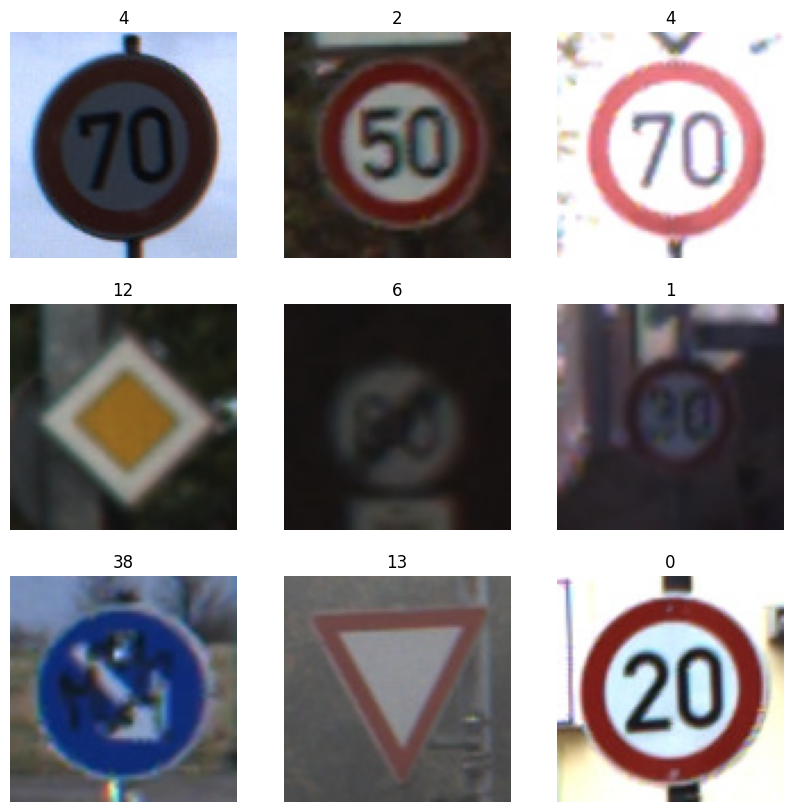

In [4]:
# View 9 images and their class labels
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

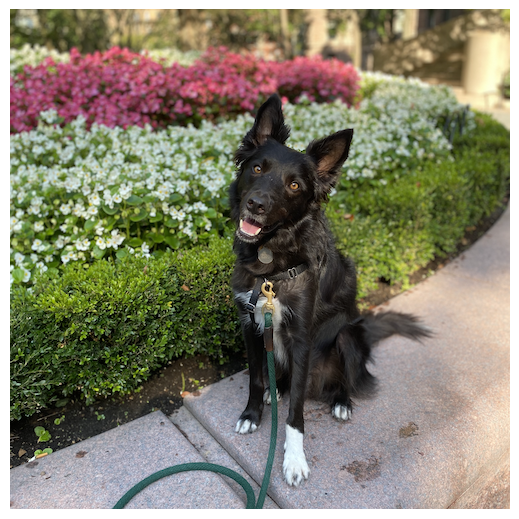

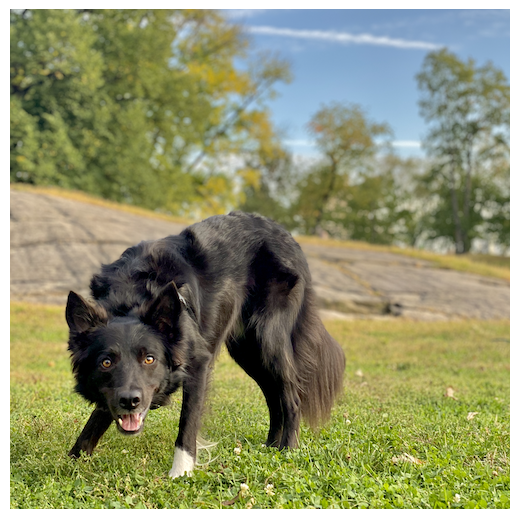

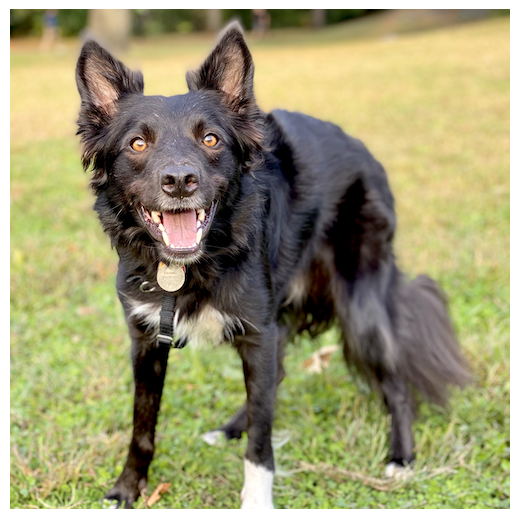

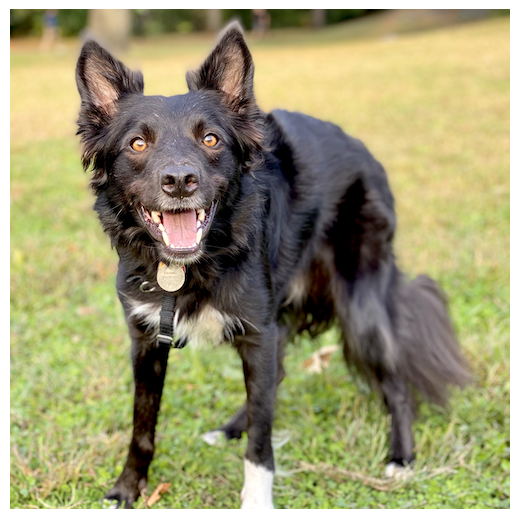

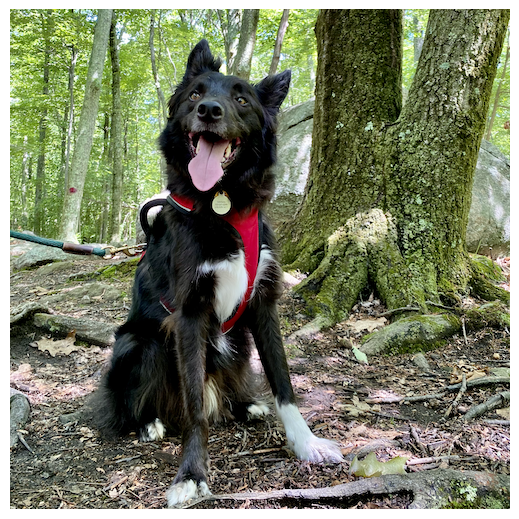

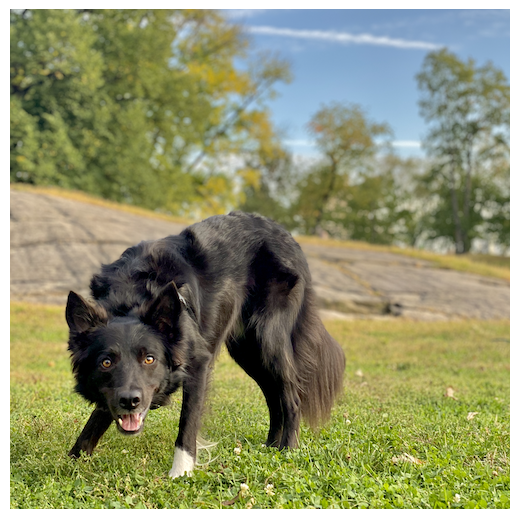

In [18]:
sns.dogplot()
sns.dogplot()
sns.dogplot()
sns.dogplot()
sns.dogplot()
sns.dogplot()

In [6]:
# Build a model...
# train_images, test_images = train_images / 255.0, test_images / 255.0

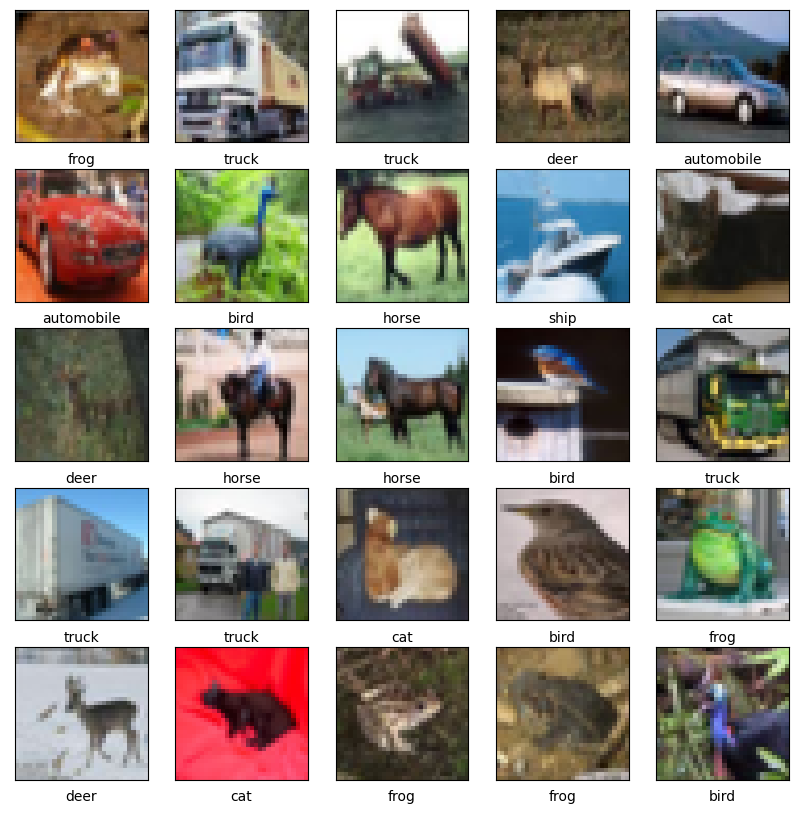

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = ResNet50(weights='imagenet')

2022-11-14 12:52:35.269241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 12:52:35.348480: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 12:52:35.348812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 12:52:35.349341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/home/mathidiot/miniconda3/envs/tf/lib/python3.9/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2022-11-14 12:52:53.428072: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-14 12:52:55.795287: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-14 12:52:55.798551: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-14 12:52:55.798674: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-14 12:52:55.801741: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or dir

981/981 [==============================] - 261s 251ms/step - loss: 0.2462 - accuracy: 0.9360 - val_loss: 0.4448 - val_accuracy: 0.8936
Epoch 2/10
981/981 [==============================] - 241s 245ms/step - loss: 0.0574 - accuracy: 0.9852 - val_loss: 1.7098 - val_accuracy: 0.7717
Epoch 3/10
713/981 [====================>.........] - ETA: 1:01 - loss: 0.0316 - accuracy: 0.9918

KeyboardInterrupt: 

AttributeError: 'History' object has no attribute 'append'

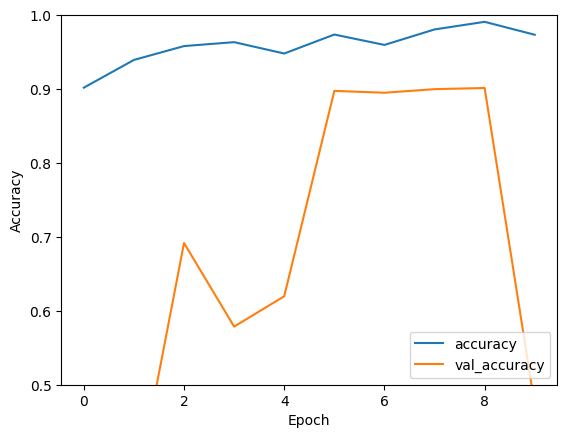

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(validation_datagen, validation_generator, verbose=2)

246/246 [==============================] - 20s 70ms/step


2022-11-14 09:52:41.748672: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31364000 exceeds 10% of free system memory.
/home/mathidiot/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:0.4846320622369596 precision:0.7114310238168575 f1:0.48618380629745783 accuracy:0.4846320622369596


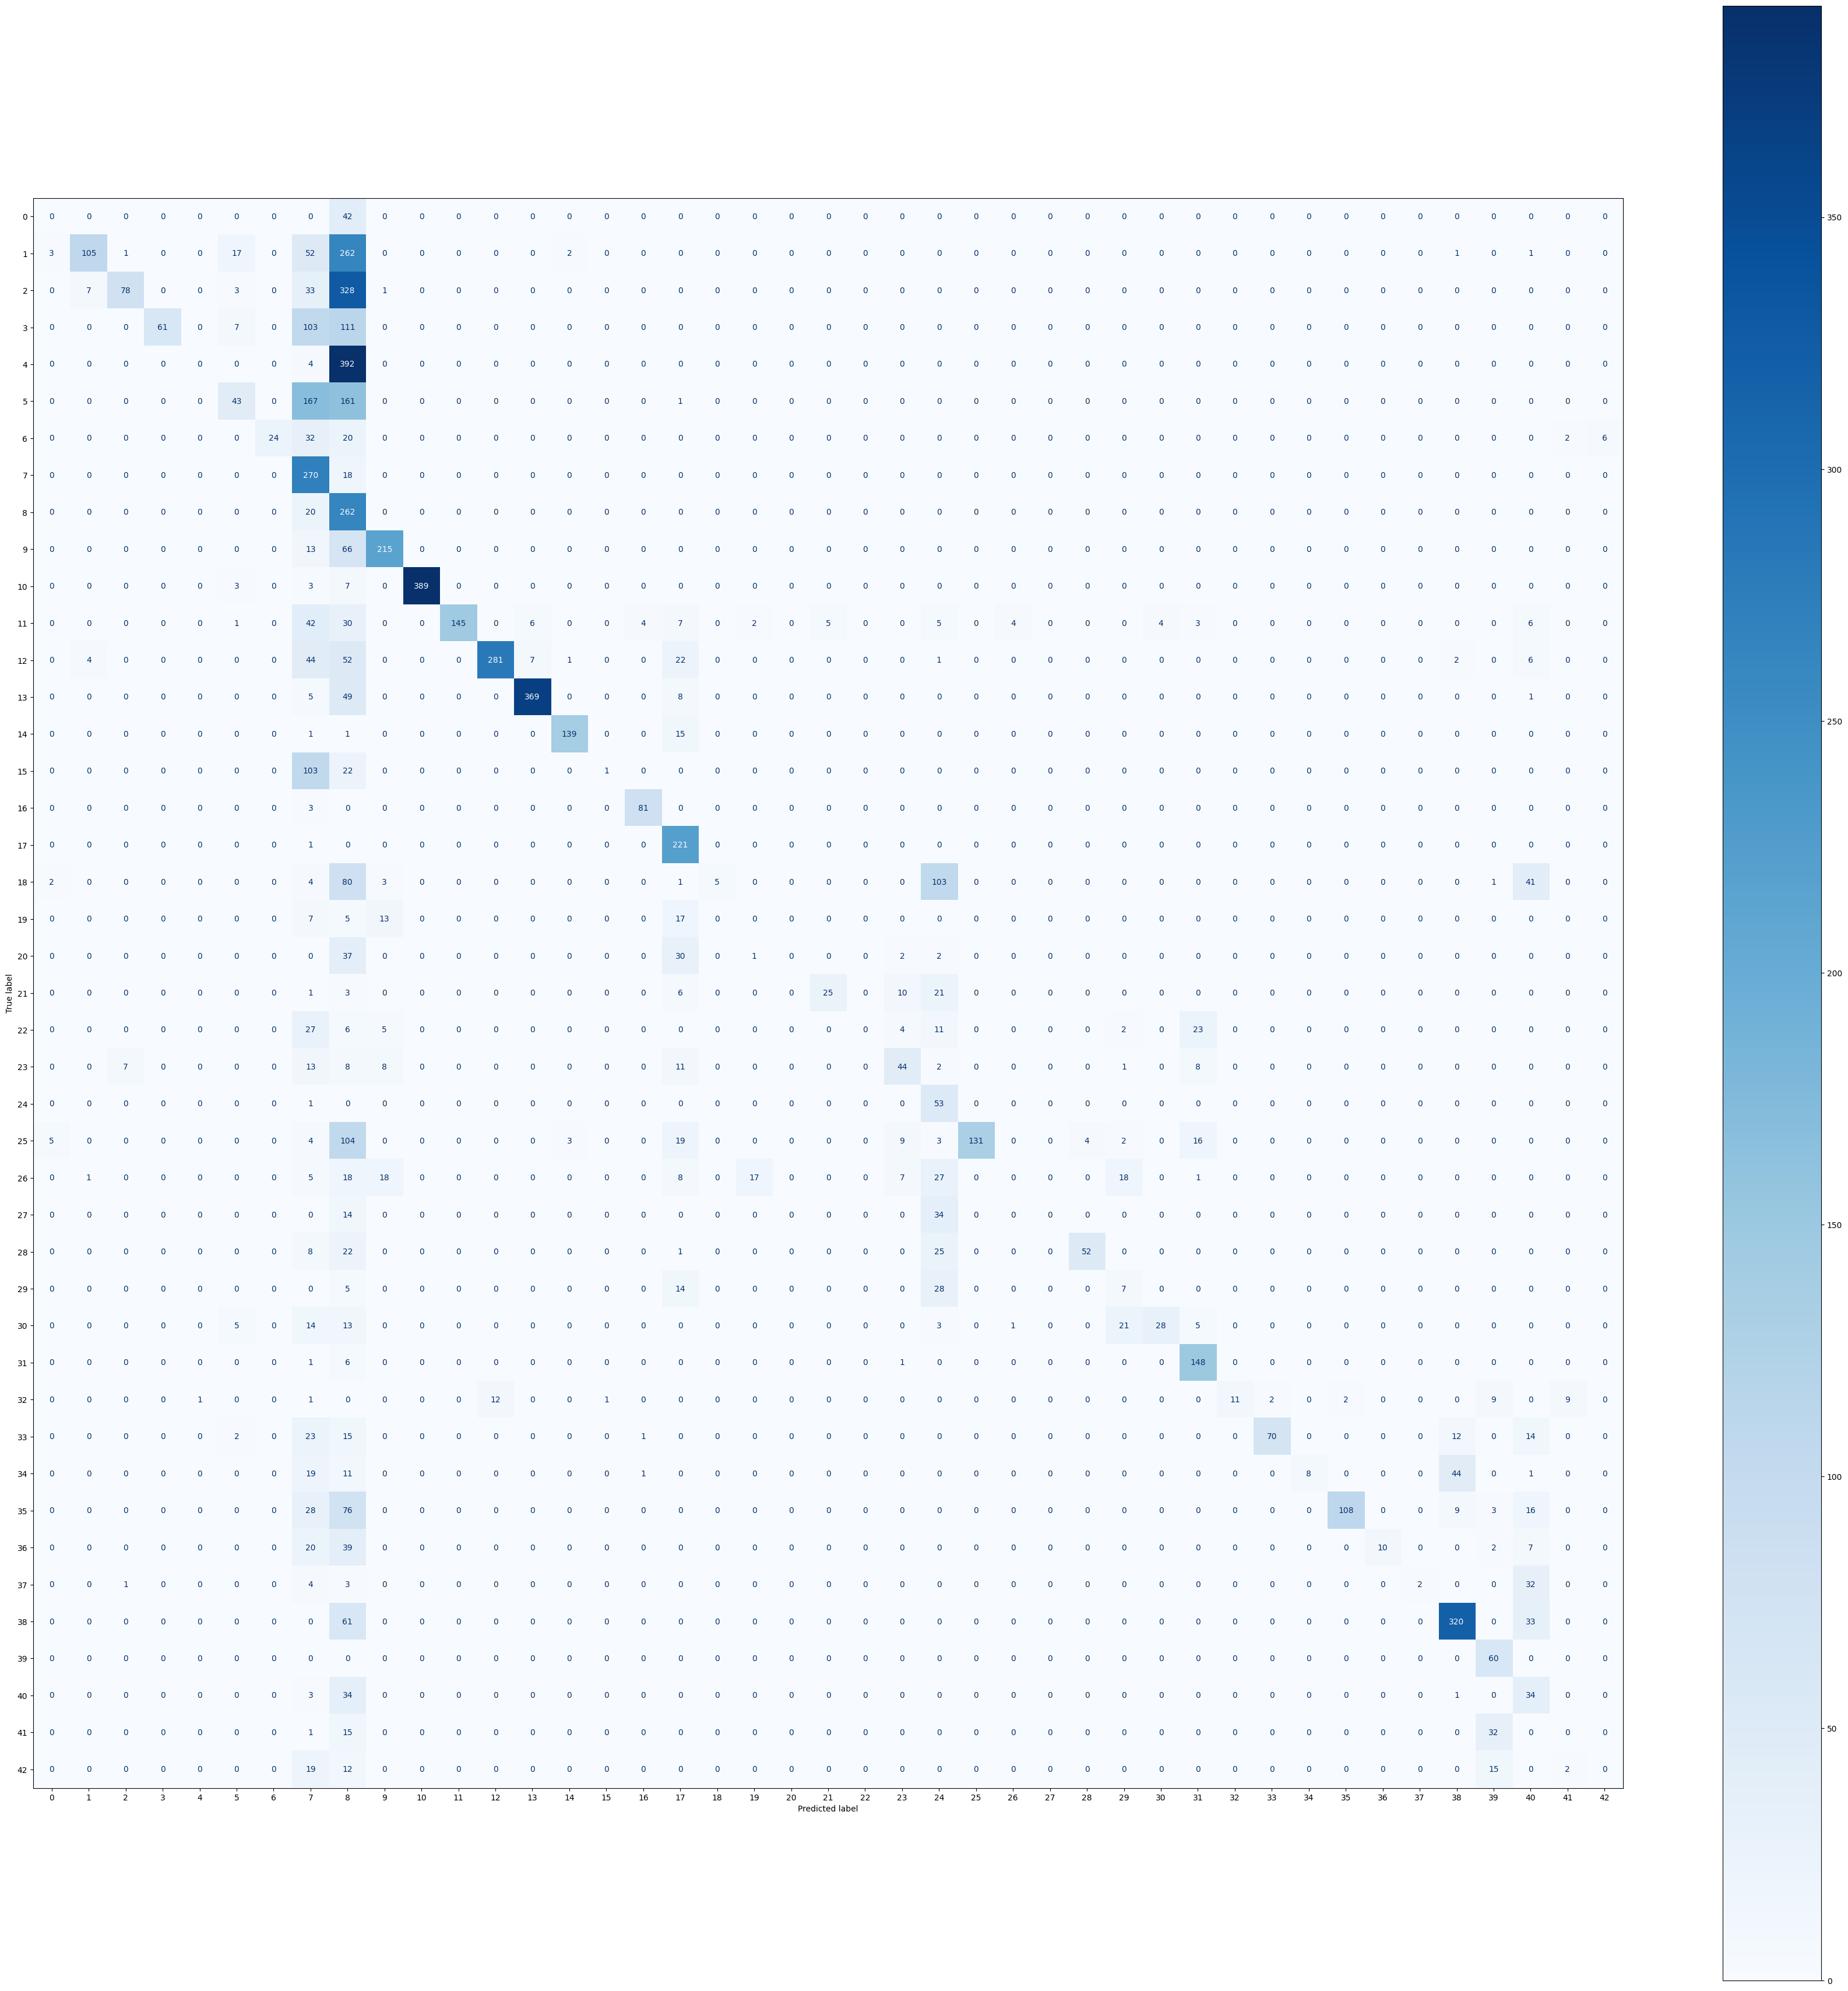

In [26]:
labels = validation_generator.labels
validation_generator.reset()

probabilities = model.predict(validation_generator)
predictions = np.array([np.argmax(probabs) for probabs in probabilities])
recall_score(labels, predictions, average="weighted")
recall = recall_score(labels, predictions, average="weighted")
precision = precision_score(labels, predictions, average="weighted")
f1 = f1_score(labels, predictions, average="weighted")
accuracy = accuracy_score(validation_generator.labels, predictions)
print ("recall:" + str(recall) + " precision:" + str(precision)+ " f1:" + str(f1)+ " accuracy:" + str(accuracy))
cmd = ConfusionMatrixDisplay(confusion_matrix(labels,predictions))
fig, ax = plt.subplots(figsize = (44,44))
cmd.plot(ax=ax,cmap='Blues', values_format='.5g')

NameError: name 'model' is not defined

## Testing the model
Once you have built and trained your model, the next step is to run the test images through it and see how well your model does at making predictions for images it has never seen before. 

Since loading these images and formatting them for the model can be tricky, you may find the following code useful. This code only uses your model to predict the class label for a given image. You'll still need to compare those predictions to the "ground truth" class labels in `test_classes_partial.csv` to evaluate how well the model does.



```
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]
```



## Partial Hold out Dataset
You're given the answers to the first 200 images in the hold out dataset. 

Once you have predictions for the partial holdout dataset, you'll need to compare those predictions against the "ground truth" class labels in `test_classes_partial.csv` to evaluate how well the model does. 

Make sure to use the insights gained from the partial hold out dataset in your executive summary.

Once you feel confident, you will need to predict for the full test dataset using the following code, and submit your csv file:

```
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]
```